In [1]:
%matplotlib inline

import logging

import emcee
import h5py
import numpy as np
import matplotlib.pyplot as plt

from os import path
import sys
sys.path.insert(0, path.abspath('../'))

from src import workdir, parse_model_parameter_file
from src.emulator import Emulator
from src.mcmc import Chain

In [10]:
validationIdx = 19
exp_path = "../validation_data/IPGlasmaDiffraction_{:02d}/Bayesian_output.txt".format(validationIdx)
model_par = "../model_parameter_dict_examples/IPGlasmaDiffraction.txt"
training_set = "../training_data"
mymcmc = Chain(expdata_path=exp_path, model_parafile=model_par,
               training_data_path=training_set, npc=7)

[INFO][mcmc] Initializing MCMC ...
[INFO][mcmc] Final Markov Chain results will be saved in mcmc/chain.h5
[INFO][mcmc] Loading the model parameters space from ../model_parameter_dict_examples/IPGlasmaDiffraction.txt ...
[INFO][mcmc] Loading the experiment data from ../validation_data/IPGlasmaDiffraction_19/Bayesian_output.txt ...
[INFO][mcmc] Initializing emulators for the training model ...
[INFO][emulator] loading training data from ../training_data ...
[INFO][emulator] All training data are loaded.
[INFO][emulator] 7 PCs explain 0.99981 of variance
[INFO][emulator] Training emulators...
[INFO][emulator] GP 0: 0.89559 of variance, LML = 62.827, kernel: 3.3**2 * RBF(length_scale=[5.36, 65.4, 20.4, 4.39, 19.4, 1.28]) + WhiteKernel(noise_level=0.00324)
[INFO][emulator] GP 1: 0.05621 of variance, LML = -23.29, kernel: 3.04**2 * RBF(length_scale=[2.71, 12.4, 28.1, 4.89, 6.39, 2.18]) + WhiteKernel(noise_level=0.0219)
[INFO][emulator] GP 2: 0.02902 of variance, LML = -52.911, kernel: 2.57**

/usr/local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 5 of parameter k1__k2__length_scale is close to the specified upper bound 130.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/usr/local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 2 of parameter k1__k2__length_scale is close to the specified lower bound 0.099. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


In [11]:
paramFile = "../validation_data/IPGlasmaDiffraction_{0:02d}/parameter_{0:02d}".format(validationIdx)
mymcmc.set_closure_test_truth(paramFile)

In [12]:
nsteps = 5000
nwalkers = 100
nburnsteps = 5000
status = None
sampler = mymcmc.run_mcmc(nsteps=nsteps, nburnsteps=nburnsteps,
                          nwalkers=nwalkers, status=status)

[INFO][mcmc] Starting MCMC ...
[INFO][mcmc] no existing chain found, starting initial burn-in
[INFO][mcmc] running 100 walkers for 2500 steps
[INFO][mcmc] step 250: acceptance fraction: mean 0.3260, std 0.0802, min 0.0120, max 0.4160
[INFO][mcmc] step 500: acceptance fraction: mean 0.3434, std 0.0716, min 0.0060, max 0.4160
[INFO][mcmc] step 750: acceptance fraction: mean 0.3489, std 0.0693, min 0.0040, max 0.4227
[INFO][mcmc] step 1000: acceptance fraction: mean 0.3556, std 0.0674, min 0.0040, max 0.4340
[INFO][mcmc] step 1250: acceptance fraction: mean 0.3589, std 0.0664, min 0.0040, max 0.4248
[INFO][mcmc] step 1500: acceptance fraction: mean 0.3626, std 0.0659, min 0.0033, max 0.4187
[INFO][mcmc] step 1750: acceptance fraction: mean 0.3613, std 0.0651, min 0.0029, max 0.4126
[INFO][mcmc] step 2000: acceptance fraction: mean 0.3616, std 0.0624, min 0.0025, max 0.4120
[INFO][mcmc] step 2250: acceptance fraction: mean 0.3633, std 0.0577, min 0.0022, max 0.4089
[INFO][mcmc] step 2500: 

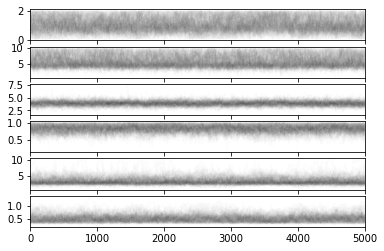

m = 1.0259^{+0.6136}_{-0.4542}, truth = 1.3464
BG = 5.4580^{+2.6803}_{-1.4048}, truth = 4.4180
BGq = 3.8607^{+0.4394}_{-0.4385}, truth = 4.1991
smearQsWidth = 0.8255^{+0.1062}_{-0.1217}, truth = 0.8370
Nq = 3.0252^{+1.3542}_{-0.6718}, truth = 3.2473
QsmuRatio = 0.5012^{+0.1515}_{-0.1107}, truth = 0.4250


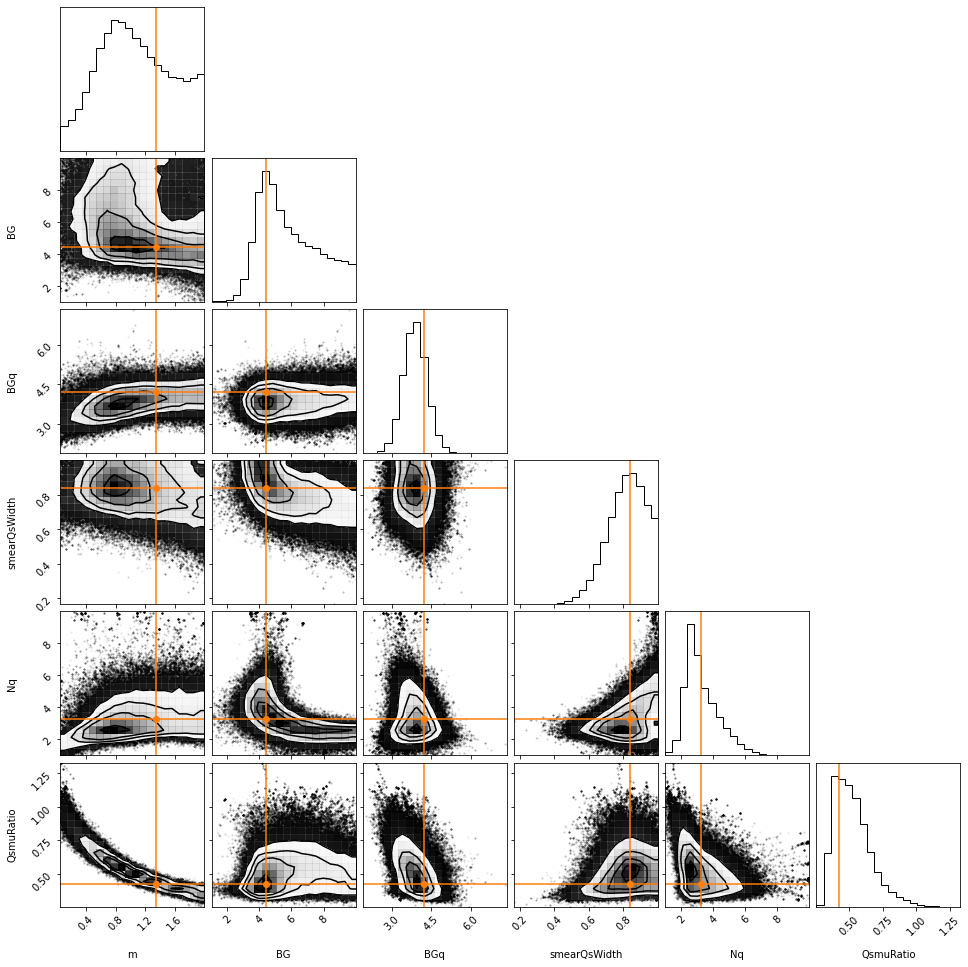

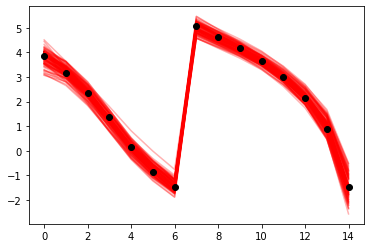

In [13]:
mymcmc.make_plots(sampler.chain)